In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import pearsonr
from PIL import Image
from annoy import AnnoyIndex


In [2]:
!pwd

/home/ubuntu/ANN


# Preload Files

In [3]:
WomenShoes=pd.read_csv('/home/ubuntu/Data/WomensShoes.csv')
womenPixel=np.load('/home/ubuntu/Data/womenPixel.npy')
MenShoes=pd.read_csv('/home/ubuntu/Data/MensShoes.csv')
menPixel=np.load('/home/ubuntu/Data/menPixel.npy')

In [4]:
f=120*120
m = AnnoyIndex(f)
m.build(10)
m.load('men_Gray.ann')

w = AnnoyIndex(f)
w.build(10)
w.load('women_Gray.ann')

True

In [5]:
def image_crop(arr):
    
    y_min=0
    while (np.sum(arr[:,y_min])==30600):
        y_min=y_min+1
        
    y_max=119
    while (np.sum(arr[:,y_max])==30600):
        y_max=y_max-1    

    x_min=0
    while (np.sum(arr[x_min,:])==30600):
        x_min=x_min+1    

    x_max=119
    while (np.sum(arr[x_max,:])==30600):
        x_max=x_max-1 
    
    Arr = arr[x_min:x_max+1,y_min:y_max+1]    
    return Arr

In [6]:
!pwd

/home/ubuntu/ANN


# Read New Images

In [7]:
fname = '/home/ubuntu/Shoe.jpeg'

In [33]:
Names=['0_m.jpg', '1_m.jpg', '2_m.jpg', '3_m.jpg', '4_m.jpg', '5_m.jpg',
       '6_m.jpg', '7_m.jpg', '8_m.jpg', '9_m.jpg']
from PIL import Image
fname = '/home/ubuntu/'+Names[9]
img = Image.open(fname).convert("L")
arr = np.asarray(img)


# Find Similar and Recommend

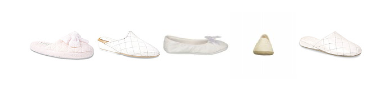

In [34]:
W_Ind=w.get_nns_by_vector(arr.flatten(),5)
combined=[np.concatenate([womenPixel[:,:,:,i] for i in W_Ind],axis=1)]
plt.imshow(combined[0].astype('uint8'))
plt.axis('off')
plt.show()

In [ ]:
np.shape(combined)

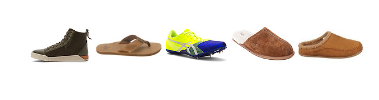

In [30]:
M_Ind=m.get_nns_by_vector(arr.flatten(),5)
combined=[np.concatenate([menPixel[:,:,:,i] for i in M_Ind],axis=1)]
plt.imshow(combined[0].astype('uint8'))
plt.axis('off')
plt.show()